In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import itertools
from scipy.spatial import distance
from pathlib import Path

In [43]:
plt.rcParams['figure.figsize'] = [10, 6]

In [118]:
HOP_SIZE = "02"

In [142]:
CELLO_FILENAME = f"embeddings/144971__nightlife999__spirit-cello_embedded_{HOP_SIZE}.npz"
TRUMPET_1_FILENAME = f"embeddings/659454__matrixxx__a-sinful-city-01_embedded_{HOP_SIZE}.npz"
TRUMPET_2_FILENAME = f"embeddings/659452__matrixxx__a-sinful-city-03_embedded_{HOP_SIZE}.npz"
DRUMS_FILENAME = f"embeddings/381516__abbasgamez__drums_embedded_{HOP_SIZE}.npz"
ENGINE_FILENAME = f"embeddings/585215__myeclecticself__car-engine-maserati-granturismo-switch-to-sport-mode-and-launch_embedded_{HOP_SIZE}.npz"

In [120]:
drums_emb = np.load(DRUMS_FILENAME)
drums_emb

NpzFile 'embeddings/381516__abbasgamez__drums_embedded_02.npz' with keys: embedding, timestamps

In [19]:
drums_emb["timestamps"].shape

(7,)

In [20]:
drums_emb["embedding"].shape

(7, 512)

In [121]:
print(drums_emb["embedding"])

[[2.430837   1.2605761  2.4791408  ... 0.21618408 2.8033617  1.2858015 ]
 [2.430837   2.0305874  2.9423616  ... 0.83232343 2.8611312  1.8799793 ]
 [2.3445363  1.9314392  2.9201162  ... 0.849379   2.9065084  2.4458067 ]
 ...
 [2.09316    2.0925746  3.757033   ... 1.2559988  2.640284   2.0826595 ]
 [2.4120893  2.129545   3.686484   ... 1.2079302  2.6229475  1.9191319 ]
 [4.3910236  2.1901007  3.724321   ... 0.69542426 4.629782   1.9202896 ]]


<Axes: title={'center': 'Drums sample'}>

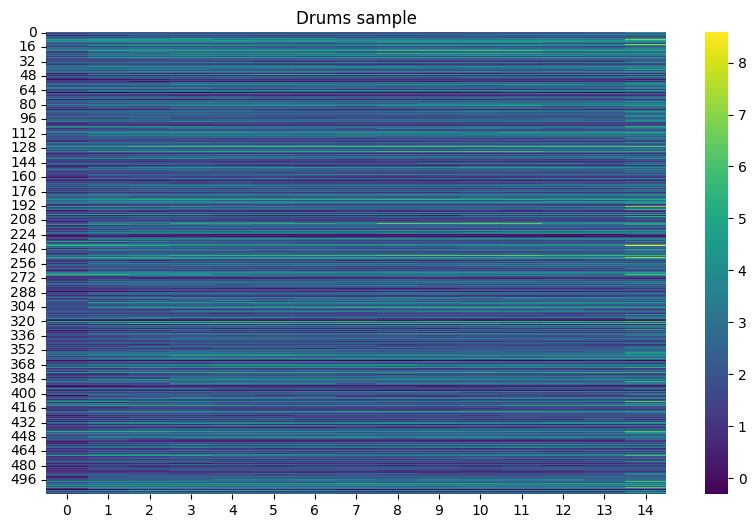

In [122]:
plt.title("Drums sample")
sns.heatmap(drums_emb["embedding"].T, cmap="viridis")

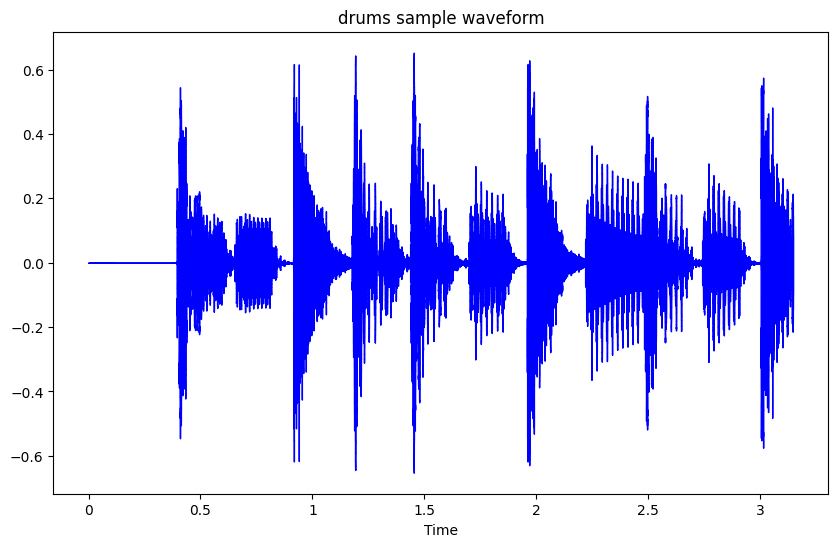

In [55]:
plt.title("drums sample waveform")
y, sr = librosa.load("raw_data/381516__abbasgamez__drums.wav")
librosa.display.waveshow(y, color="blue")

<Axes: title={'center': 'Cello sample'}>

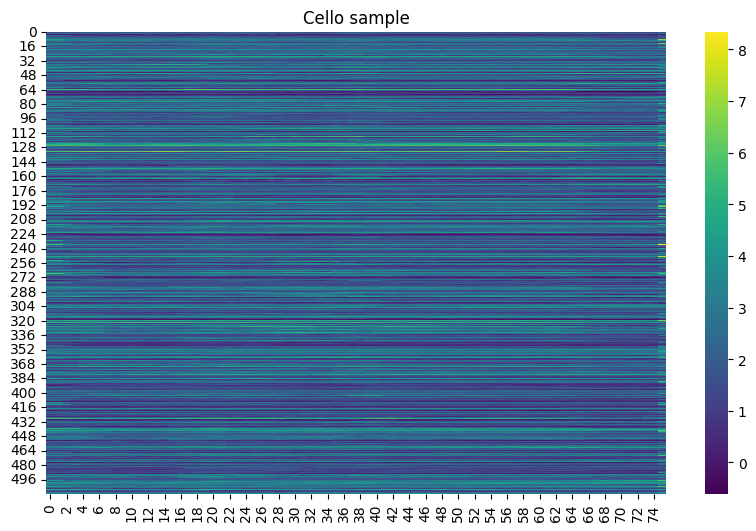

In [123]:
plt.title("Cello sample")
sns.heatmap(np.load(CELLO_FILENAME)["embedding"].T, cmap="viridis")

<Axes: title={'center': 'Trumpet sample'}>

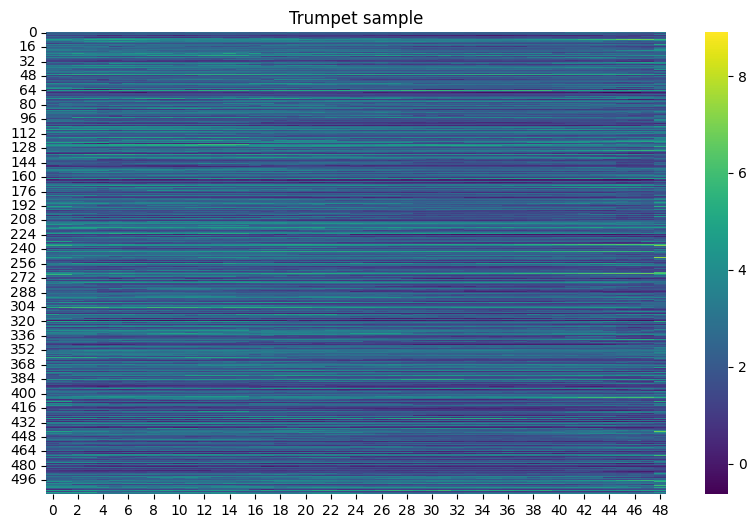

In [133]:
plt.title("Trumpet sample")
sns.heatmap(np.load(TRUMPET_1_FILENAME)["embedding"].T, cmap="viridis")

In [143]:
trumpet_emb_1 = np.load(TRUMPET_1_FILENAME)["embedding"]
trumpet_emb_2 = np.load(TRUMPET_2_FILENAME)["embedding"]
drums_emb = np.load(DRUMS_FILENAME)["embedding"]
cello_emb = np.load(CELLO_FILENAME)["embedding"]
engine_emb = np.load(ENGINE_FILENAME)["embedding"]

In [144]:
tr1 = trumpet_emb_1.mean(axis=0, keepdims=False)
tr2 = trumpet_emb_2.mean(axis=0, keepdims=False)
cello = cello_emb.mean(axis=0, keepdims=False)
dr = drums_emb.mean(axis=0, keepdims=False)
eng = engine_emb.mean(axis=0, keepdims=False)

In [126]:
tr1.shape

(512,)

In [127]:
1 - distance.cosine(tr1, tr2)

0.9959022998809814

In [128]:
1 - distance.cosine(dr, cello)

0.9415456056594849

In [146]:
1 - distance.cosine(cello, eng)

0.9295822978019714

In [129]:
def vectorized_cosine_similarity(audio1, audio2):
    """ Element-wise cosine similarity for audio """
    dot_product = np.sum(audio1 * audio2, axis=1)
    norm_audio1 = np.linalg.norm(audio1, axis=1)
    norm_audio2 = np.linalg.norm(audio2, axis=1)
    cosine_similarity = dot_product / (norm_audio1 * norm_audio2)

    return cosine_similarity

In [134]:
vectorized_cosine_similarity(trumpet_emb_1, trumpet_emb_2).mean()

0.98868966

In [135]:
vectorized_cosine_similarity(trumpet_emb_1, cello_emb[:trumpet_emb_1.shape[0] , :]).mean()

0.9332458

In [139]:
vectorized_cosine_similarity(drums_emb, cello_emb[:drums_emb.shape[0] , :]).mean()

0.93434995

In [148]:
vectorized_cosine_similarity(trumpet_emb_1, engine_emb[:trumpet_emb_1.shape[0], :]).mean()

0.9132653